In [40]:
'''Importing Run2 data and calculating parameters'''


import ROOT as R
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# location run2 file
floc = '/home/sander/Bachelor research project/root files/'
fname = 'Lb2LEE_procTuple.root'
treename = 'DecayTree;2'


# data
R.ROOT.EnableImplicitMT()
rdf = R.RDataFrame(treename,floc+fname)

# use pandas
observables = ['Lb_BKGCAT', 'L1_HasBremAdded', 'L2_HasBremAdded',
'L0_TRUEP_E', 'L0_TRUEP_X', 'L0_TRUEP_Y', 'L0_TRUEP_Z', 
'Lb_TRUEP_E', 'Lb_TRUEP_X', 'Lb_TRUEP_Y', 'Lb_TRUEP_Z',
'L1_TRUEP_E', 'L1_TRUEP_X', 'L1_TRUEP_Y', 'L1_TRUEP_Z',
'L2_TRUEP_E','L2_TRUEP_X', 'L2_TRUEP_Y', 'L2_TRUEP_Z',
'L0_PE', 'L0_PX', 'L0_PY', 'L0_PZ',
'Lb_PE', 'Lb_PX', 'Lb_PY', 'Lb_PZ',
'L1_PE', 'L1_PX', 'L1_PY', 'L1_PZ',
'L2_PE', 'L2_PX', 'L2_PY', 'L2_PZ',
]

df = pd.DataFrame(rdf.AsNumpy(observables))


# bkgcat has 10, 50, 60
bkgcat_mask = (df['Lb_BKGCAT']!=60)
brem1_mask = (df['L1_HasBremAdded']==1) & (df['L2_HasBremAdded']==0) # mask l1 has bremadded
brem2_mask = (df['L2_HasBremAdded']==1) & (df['L1_HasBremAdded']==0) # mask l2 has bremadded
brem0_mask = (df['L1_HasBremAdded']==0) & (df['L2_HasBremAdded']==0) # mask no bremadded
bremboth_mask = (df['L1_HasBremAdded']==1) & (df['L2_HasBremAdded']==1) 
bremsingle_mask = brem1_mask | brem2_mask

# different dataframes with different brem masks
dfB1 = df[bkgcat_mask & bremsingle_mask]
dfB0 = df[bkgcat_mask & brem0_mask]
dfB2 = df[bkgcat_mask & bremboth_mask]


# Reconstructing variables - TRUE - Leptonic (P and PE are squared values of momentum and energy)
ee_TRUE_P_lep = (dfB2['L1_TRUEP_X']+dfB2['L2_TRUEP_X'])**2 + (dfB2['L1_TRUEP_Y']+dfB2['L2_TRUEP_Y'])**2 + (dfB2['L1_TRUEP_Z']+dfB2['L2_TRUEP_Z'])**2
ee_TRUE_PE_lep = (dfB2['L1_TRUEP_E'] + dfB2['L2_TRUEP_E'])**2
ee_TRUE_M_lep = np.sqrt(ee_TRUE_PE_lep - ee_TRUE_P_lep)

# same for different bremadded
ee_TRUE_P_lep_B1 = (dfB1['L1_TRUEP_X']+dfB1['L2_TRUEP_X'])**2 + (dfB1['L1_TRUEP_Y']+dfB1['L2_TRUEP_Y'])**2 + (dfB1['L1_TRUEP_Z']+dfB1['L2_TRUEP_Z'])**2
ee_TRUE_PE_lep_B1 = (dfB1['L1_TRUEP_E'] + dfB1['L2_TRUEP_E'])**2
ee_TRUE_M_lep_B1 = np.sqrt(ee_TRUE_PE_lep_B1 - ee_TRUE_P_lep_B1)
ee_TRUE_P_lep_B0 = (dfB0['L1_TRUEP_X']+dfB0['L2_TRUEP_X'])**2 + (dfB0['L1_TRUEP_Y']+dfB0['L2_TRUEP_Y'])**2 + (dfB0['L1_TRUEP_Z']+dfB0['L2_TRUEP_Z'])**2
ee_TRUE_PE_lep_B0 = (dfB0['L1_TRUEP_E'] + dfB0['L2_TRUEP_E'])**2
ee_TRUE_M_lep_B0 = np.sqrt(ee_TRUE_PE_lep_B0 - ee_TRUE_P_lep_B0)


# Reconstructing variables - TRUE - Hadronic (P and PE are squared values of momentum and energy)
ee_TRUE_P_hadr = (dfB2['Lb_TRUEP_X']-dfB2['L0_TRUEP_X'])**2 + (dfB2['Lb_TRUEP_Y']-dfB2['L0_TRUEP_Y'])**2 + (dfB2['Lb_TRUEP_Z']-dfB2['L0_TRUEP_Z'])**2
ee_TRUE_PE_hadr = (dfB2['Lb_TRUEP_E'] - dfB2['L0_TRUEP_E'])**2
ee_TRUE_M_hadr = np.sqrt(ee_TRUE_PE_hadr - ee_TRUE_P_hadr)


# Reconstructing variables - REC - Leptonic (P and PE are squared values of momentum and energy)
ee_REC_P_lep = (dfB2['L1_PX']+dfB2['L2_PX'])**2 + (dfB2['L1_PY']+dfB2['L2_PY'])**2 + (dfB2['L1_PZ']+dfB2['L2_PZ'])**2
ee_REC_PE_lep = (dfB2['L1_PE'] + dfB2['L2_PE'])**2
ee_REC_M_lep = np.sqrt(ee_REC_PE_lep - ee_REC_P_lep)

# same for different bremadded
ee_REC_P_lep_B1 = (dfB1['L1_PX']+dfB1['L2_PX'])**2 + (dfB1['L1_PY']+dfB1['L2_PY'])**2 + (dfB1['L1_PZ']+dfB1['L2_PZ'])**2
ee_REC_PE_lep_B1 = (dfB1['L1_PE'] + dfB1['L2_PE'])**2
ee_REC_M_lep_B1 = np.sqrt(ee_REC_PE_lep_B1 - ee_REC_P_lep_B1)
ee_REC_P_lep_B0 = (dfB0['L1_PX']+dfB0['L2_PX'])**2 + (dfB0['L1_PY']+dfB0['L2_PY'])**2 + (dfB0['L1_PZ']+dfB0['L2_PZ'])**2
ee_REC_PE_lep_B0 = (dfB0['L1_PE'] + dfB0['L2_PE'])**2
ee_REC_M_lep_B0 = np.sqrt(ee_REC_PE_lep_B0 - ee_REC_P_lep_B0)



# Reconstructing variables - REC - Hadronic (P and PE are squared values of momentum and energy)
ee_REC_P_hadr = (dfB2['Lb_PX']-dfB2['L0_PX'])**2 + (dfB2['Lb_PY']-dfB2['L0_PY'])**2 + (dfB2['Lb_PZ']-dfB2['L0_PZ'])**2
ee_REC_PE_hadr = (dfB2['Lb_PE'] - dfB2['L0_PE'])**2
ee_REC_M_hadr = np.sqrt(ee_REC_PE_hadr - ee_REC_P_hadr)

/home/sander/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
'''
Importing Run3 data and calculating parameters 

(this block is the same as above but then for upgrade. Variables have UP in their name so no variables get mixed up)
'''

# location 
flocUP = '/home/sander/Bachelor research project/root files/'
fnameUP = 'ntuples_mc_lb2lee_upgrade.root'
treenameUP = 'TupleLb2Lee/DecayTree;1'

# data
R.ROOT.EnableImplicitMT()
rdfUP = R.RDataFrame(treenameUP,flocUP+fnameUP)

# use pandas
observablesUP = ['Lb_BKGCAT',
'L0_TRUEP_E', 'L0_TRUEP_X', 'L0_TRUEP_Y', 'L0_TRUEP_Z', 
'Lb_TRUEP_E', 'Lb_TRUEP_X', 'Lb_TRUEP_Y', 'Lb_TRUEP_Z',
'em_TRUEP_E', 'em_TRUEP_X', 'em_TRUEP_Y', 'em_TRUEP_Z',
'ep_TRUEP_E','ep_TRUEP_X', 'ep_TRUEP_Y', 'ep_TRUEP_Z',
'L0_PE', 'L0_PX', 'L0_PY', 'L0_PZ',
'Lb_PE', 'Lb_PX', 'Lb_PY', 'Lb_PZ',
'em_PE', 'em_PX', 'em_PY', 'em_PZ',
'ep_PE', 'ep_PX', 'ep_PY', 'ep_PZ',
'Lb_M',
'em_PP_CaloHasBrem', 'ep_PP_CaloHasBrem'
]


dfUP = pd.DataFrame(rdfUP.AsNumpy(observablesUP))


# bkgcat has 10, 30, 40, 50, 60, 63, 66, 70, 80, 100, 110, 120, 130 
bkgcat_maskUP = (dfUP['Lb_BKGCAT']==10) | (dfUP['Lb_BKGCAT']==50)
pz_maskUP = (dfUP['em_TRUEP_Z']>100) & (dfUP['ep_TRUEP_Z']>100) # cutting out the weird <100 MeV TRUEP_Z values



brem1_maskUP = (dfUP['em_PP_CaloHasBrem']==1) & (dfUP['ep_PP_CaloHasBrem']==0) # l1 bremadded
brem2_maskUP = (dfUP['ep_PP_CaloHasBrem']==1) & (dfUP['em_PP_CaloHasBrem']==0) # l2 bremadded
brem0_maskUP = (dfUP['em_PP_CaloHasBrem']==0) & (dfUP['ep_PP_CaloHasBrem']==0) # no bremadded
bremboth_maskUP = (dfUP['em_PP_CaloHasBrem']==1) & (dfUP['ep_PP_CaloHasBrem']==1) # both bremadded
bremsingle_maskUP = brem1_maskUP | brem2_maskUP # 1e bremadded

# different df for different brem categories
dfUPB1 = dfUP[bkgcat_maskUP & bremsingle_maskUP & pz_maskUP]
dfUPB0 = dfUP[bkgcat_maskUP & pz_maskUP & brem0_maskUP]
dfUPB2 = dfUP[bkgcat_maskUP & bremboth_maskUP & pz_maskUP]


# Reconstructing variables - TRUE - Leptonic (P and PE are squared values of momentum and energy)
ee_TRUE_P_lep_UP = (dfUPB2['em_TRUEP_X']+dfUPB2['ep_TRUEP_X'])**2 + (dfUPB2['em_TRUEP_Y']+dfUPB2['ep_TRUEP_Y'])**2 + (dfUPB2['em_TRUEP_Z']+dfUPB2['ep_TRUEP_Z'])**2
ee_TRUE_PE_lep_UP = (dfUPB2['em_TRUEP_E'] + dfUPB2['ep_TRUEP_E'])**2
ee_TRUE_M_lep_UP = np.sqrt(ee_TRUE_PE_lep_UP - ee_TRUE_P_lep_UP)

# now for different bremadded
ee_TRUE_P_lep_UP_B1 = (dfUPB1['em_TRUEP_X']+dfUPB1['ep_TRUEP_X'])**2 + (dfUPB1['em_TRUEP_Y']+dfUPB1['ep_TRUEP_Y'])**2 + (dfUPB1['em_TRUEP_Z']+dfUPB1['ep_TRUEP_Z'])**2
ee_TRUE_PE_lep_UP_B1 = (dfUPB1['em_TRUEP_E'] + dfUPB1['ep_TRUEP_E'])**2
ee_TRUE_M_lep_UP_B1 = np.sqrt(ee_TRUE_PE_lep_UP_B1 - ee_TRUE_P_lep_UP_B1)
ee_TRUE_P_lep_UP_B0 = (dfUPB0['em_TRUEP_X']+dfUPB0['ep_TRUEP_X'])**2 + (dfUPB0['em_TRUEP_Y']+dfUPB0['ep_TRUEP_Y'])**2 + (dfUPB0['em_TRUEP_Z']+dfUPB0['ep_TRUEP_Z'])**2
ee_TRUE_PE_lep_UP_B0 = (dfUPB0['em_TRUEP_E'] + dfUPB0['ep_TRUEP_E'])**2
ee_TRUE_M_lep_UP_B0 = np.sqrt(ee_TRUE_PE_lep_UP_B0 - ee_TRUE_P_lep_UP_B0)


# Reconstructing variables - TRUE - Hadronic (P and PE are squared values of momentum and energy)
ee_TRUE_P_hadr_UP = (dfUPB2['Lb_TRUEP_X']-dfUPB2['L0_TRUEP_X'])**2 + (dfUPB2['Lb_TRUEP_Y']-dfUPB2['L0_TRUEP_Y'])**2 + (dfUPB2['Lb_TRUEP_Z']-dfUPB2['L0_TRUEP_Z'])**2
ee_TRUE_PE_hadr_UP = (dfUPB2['Lb_TRUEP_E'] - dfUPB2['L0_TRUEP_E'])**2
ee_TRUE_M_hadr_UP = np.sqrt(ee_TRUE_PE_hadr_UP - ee_TRUE_P_hadr_UP)


# Reconstructing variables - REC - Leptonic (P and PE are squared values of momentum and energy)
ee_REC_P_lep_UP = (dfUPB2['em_PX']+dfUPB2['ep_PX'])**2 + (dfUPB2['em_PY']+dfUPB2['ep_PY'])**2 + (dfUPB2['em_PZ']+dfUPB2['ep_PZ'])**2
ee_REC_PE_lep_UP = (dfUPB2['em_PE'] + dfUPB2['ep_PE'])**2
ee_REC_M_lep_UP = np.sqrt(ee_REC_PE_lep_UP - ee_REC_P_lep_UP)

# now for different bremadded
ee_REC_P_lep_UP_B1 = (dfUPB1['em_PX']+dfUPB1['ep_PX'])**2 + (dfUPB1['em_PY']+dfUPB1['ep_PY'])**2 + (dfUPB1['em_PZ']+dfUPB1['ep_PZ'])**2
ee_REC_PE_lep_UP_B1 = (dfUPB1['em_PE'] + dfUPB1['ep_PE'])**2
ee_REC_M_lep_UP_B1 = np.sqrt(ee_REC_PE_lep_UP_B1 - ee_REC_P_lep_UP_B1)
ee_REC_P_lep_UP_B0 = (dfUPB0['em_PX']+dfUPB0['ep_PX'])**2 + (dfUPB0['em_PY']+dfUPB0['ep_PY'])**2 + (dfUPB0['em_PZ']+dfUPB0['ep_PZ'])**2
ee_REC_PE_lep_UP_B0 = (dfUPB0['em_PE'] + dfUPB0['ep_PE'])**2
ee_REC_M_lep_UP_B0 = np.sqrt(ee_REC_PE_lep_UP_B0 - ee_REC_P_lep_UP_B0)


# Reconstructing variables - REC - Hadronic (P and PE are squared values of momentum and energy)
ee_REC_P_hadr_UP = (dfUPB2['Lb_PX']-dfUPB2['L0_PX'])**2 + (dfUPB2['Lb_PY']-dfUPB2['L0_PY'])**2 + (dfUPB2['Lb_PZ']-dfUPB2['L0_PZ'])**2
ee_REC_PE_hadr_UP = (dfUPB2['Lb_PE'] - dfUPB2['L0_PE'])**2
ee_REC_M_hadr_UP = np.sqrt(ee_REC_PE_hadr_UP - ee_REC_P_hadr_UP)






# All other variables I would like to plot (both bremadded):
res_lep = (ee_REC_M_lep - ee_TRUE_M_lep) / ee_TRUE_M_lep
res_lep = res_lep[abs(res_lep) <1] #cutting out outliers in inv mass
res_hadr =  (ee_REC_M_hadr - ee_TRUE_M_hadr) / ee_TRUE_M_hadr
res_hadr = res_hadr[abs(res_hadr) <1]
res_lep_UP = (ee_REC_M_lep_UP - ee_TRUE_M_lep_UP) / ee_TRUE_M_lep_UP
res_lep_UP = res_lep_UP[abs(res_lep_UP) <1]
res_hadr_UP =  (ee_REC_M_hadr_UP - ee_TRUE_M_hadr_UP) / ee_TRUE_M_hadr_UP
res_hadr_UP = res_hadr_UP[abs(res_hadr_UP) <1]


diff_TRUE_M_LH = ee_TRUE_M_lep - ee_TRUE_M_hadr 
diff_REC_M_LH = ee_REC_M_lep - ee_REC_M_hadr
diff_TRUE_M_LH_UP = ee_TRUE_M_lep_UP - ee_TRUE_M_hadr_UP 
diff_REC_M_LH_UP = ee_REC_M_lep_UP - ee_REC_M_hadr_UP


# bremadded categories
res_lep_B1 = (ee_REC_M_lep_B1 - ee_TRUE_M_lep_B1) / ee_TRUE_M_lep_B1
res_lep_B1 = res_lep_B1[abs(res_lep_B1) <1]
res_lep_B0 = (ee_REC_M_lep_B0 - ee_TRUE_M_lep_B0) / ee_TRUE_M_lep_B0
res_lep_B0 = res_lep_B0[abs(res_lep_B0) <1]
res_lep_UP_B1 = (ee_REC_M_lep_UP_B1 - ee_TRUE_M_lep_UP_B1) / ee_TRUE_M_lep_UP_B1
res_lep_UP_B1 = res_lep_UP_B1[abs(res_lep_UP_B1) <1]
res_lep_UP_B0 = (ee_REC_M_lep_UP_B0 - ee_TRUE_M_lep_UP_B0) / ee_TRUE_M_lep_UP_B0
res_lep_UP_B0 = res_lep_UP_B0[abs(res_lep_UP_B0) <1]





# combining all in 1 df otherwise plotting doesnt work for some reason
df_inv_M = pd.concat([ee_TRUE_M_lep, ee_REC_M_lep, ee_TRUE_M_lep_UP, ee_REC_M_lep_UP, diff_TRUE_M_LH, diff_TRUE_M_LH_UP, diff_REC_M_LH, diff_REC_M_LH_UP, res_lep, res_lep_UP, res_hadr, res_hadr_UP])


# combining bremadded in 1 df
df_inv_M_B = pd.concat([res_lep_B1, res_lep_B0, res_lep_UP_B1, res_lep_UP_B0])


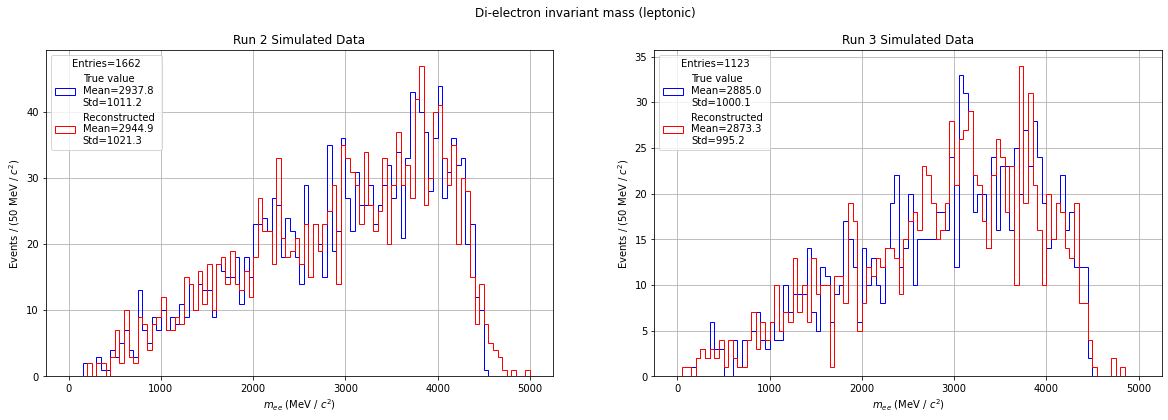

In [42]:
'''Invariant mass graph TRUE and reconstructed - LEPTONIC '''



fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle(f'Di-electron invariant mass (leptonic)')
ax1.hist(ee_TRUE_M_lep, bins=100, range=(0, 5000), histtype='step', color='b', label=f'True value \nMean={round(ee_TRUE_M_lep.mean(), 1)} \nStd={round(ee_TRUE_M_lep.std(), 1)}')
ax1.hist(ee_REC_M_lep, bins=100, range=(0, 5000), histtype='step', color='r', label=f'Reconstructed \nMean={round(ee_REC_M_lep.mean(), 1)} \nStd={round(ee_REC_M_lep.std(), 1)}')
ax2.hist(ee_TRUE_M_lep_UP, bins=100, range=(0, 5000), histtype='step', color='b', label=f'True value \nMean={round(ee_TRUE_M_lep_UP.mean(), 1)} \nStd={round(ee_TRUE_M_lep_UP.std(), 1)}')
ax2.hist(ee_REC_M_lep_UP, bins=100, range=(0, 5000), histtype='step', color='r', label=f'Reconstructed \nMean={round(ee_REC_M_lep_UP.mean(), 1)} \nStd={round(ee_REC_M_lep_UP.std(), 1)}')
ax1.grid()
ax2.grid()
ax1.set_title('Run 2 Simulated Data')
ax2.set_title('Run 3 Simulated Data')
ax1.set_ylabel(r'Events / (50 MeV / $c^2$)')
ax1.set_xlabel(r'$m_{ee}$ (MeV / $c^2$)')
ax2.set_ylabel(r'Events / (50 MeV / $c^2$)')
ax2.set_xlabel(r'$m_{ee}$ (MeV / $c^2$)')
ax1.legend(loc='upper left', title=f'Entries={len(ee_TRUE_M_lep)}')
ax2.legend(loc='upper left', title=f'Entries={len(ee_TRUE_M_lep_UP)}')



plt.show()

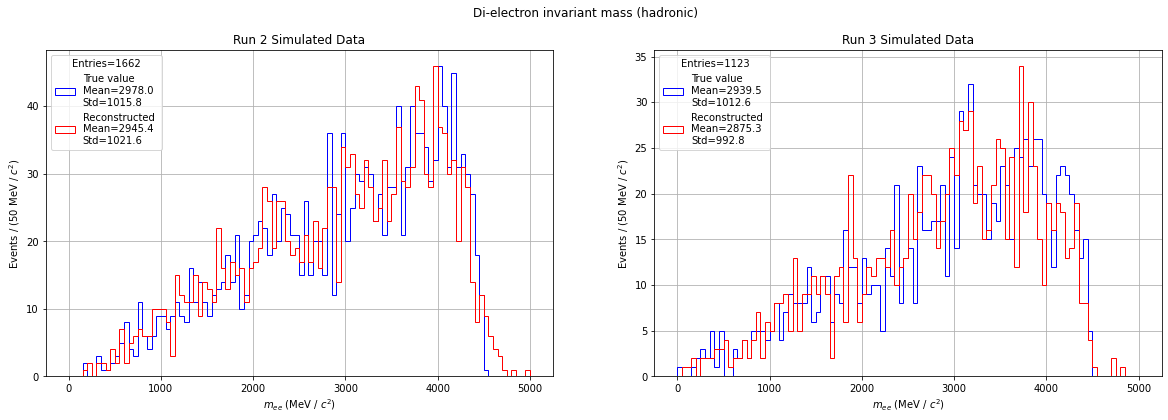

In [43]:
'''Invariant mass graph True and reconstructed - HADRONIC '''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle(f'Di-electron invariant mass (hadronic)')
ax1.hist(ee_TRUE_M_hadr, bins=100, range=(0, 5000), histtype='step', color='b', label=f'True value \nMean={round(ee_TRUE_M_hadr.mean(), 1)} \nStd={round(ee_TRUE_M_hadr.std(), 1)}')
ax1.hist(ee_REC_M_hadr, bins=100, range=(0, 5000), histtype='step', color='r', label=f'Reconstructed \nMean={round(ee_REC_M_hadr.mean(), 1)} \nStd={round(ee_REC_M_hadr.std(), 1)}')
ax2.hist(ee_TRUE_M_hadr_UP, bins=100, range=(0, 5000), histtype='step', color='b', label=f'True value \nMean={round(ee_TRUE_M_hadr_UP.mean(), 1)} \nStd={round(ee_TRUE_M_hadr_UP.std(), 1)}')
ax2.hist(ee_REC_M_hadr_UP, bins=100, range=(0, 5000), histtype='step', color='r', label=f'Reconstructed \nMean={round(ee_REC_M_hadr_UP.mean(), 1)} \nStd={round(ee_REC_M_hadr_UP.std(), 1)}')
ax1.grid()
ax2.grid()
ax1.set_title('Run 2 Simulated Data')
ax2.set_title('Run 3 Simulated Data')
ax1.set_ylabel(r'Events / (50 MeV / $c^2$)')
ax1.set_xlabel(r'$m_{ee}$ (MeV / $c^2$)')
ax2.set_ylabel(r'Events / (50 MeV / $c^2$)')
ax2.set_xlabel(r'$m_{ee}$ (MeV / $c^2$)')
ax1.legend(loc='upper left', title=f'Entries={len(ee_TRUE_M_hadr)}')
ax2.legend(loc='upper left', title=f'Entries={len(ee_REC_M_hadr_UP)}')



plt.show()

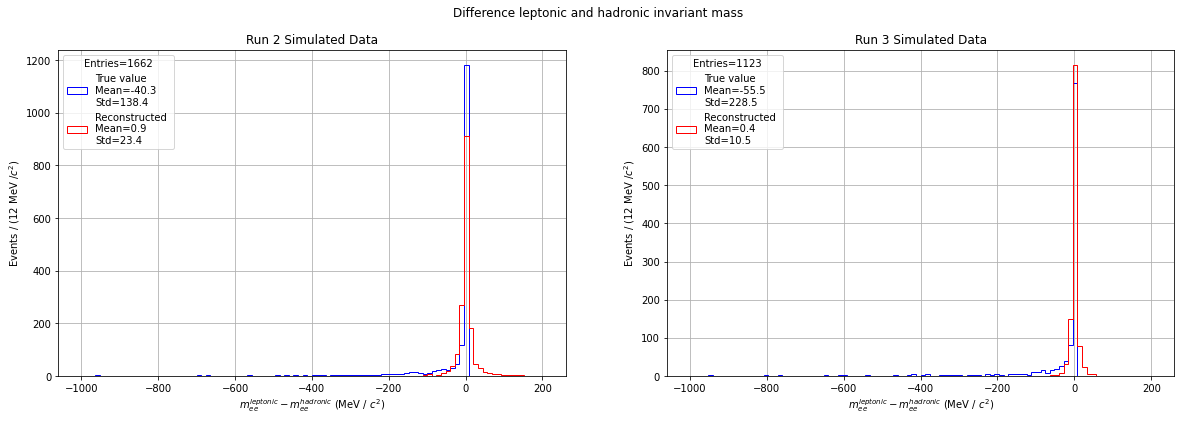

In [44]:
'''FSR TRUE and Reconstructed'''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle(r'Difference leptonic and hadronic invariant mass')
ax1.hist(diff_TRUE_M_LH, bins=100, range=(-1000, 200), histtype='step', color='b', label=f'True value \nMean={round(diff_TRUE_M_LH.mean(), 1)} \nStd={round(diff_TRUE_M_LH.std(), 1)}')
ax1.hist(diff_REC_M_LH, bins=100, range=(-1000, 200), histtype='step', color='r', label=f'Reconstructed \nMean={round(diff_REC_M_LH.mean(), 1)} \nStd={round(diff_REC_M_LH.std(), 1)}')
ax2.hist(diff_TRUE_M_LH_UP, bins=100, range=(-1000, 200), histtype='step', color='b', label=f'True value \nMean={round(diff_TRUE_M_LH_UP.mean(), 1)} \nStd={round(diff_TRUE_M_LH_UP.std(), 1)}')
ax2.hist(diff_REC_M_LH_UP, bins=100, range=(-1000, 200), histtype='step', color='r', label=f'Reconstructed \nMean={round(diff_REC_M_LH_UP.mean(), 1)} \nStd={round(diff_REC_M_LH_UP.std(), 1)}')
ax1.grid()
ax2.grid()
ax1.set_title('Run 2 Simulated Data')
ax2.set_title('Run 3 Simulated Data')
ax1.set_ylabel(r'Events / (12 MeV /$c^2$)')
ax1.set_xlabel(r'$m^{leptonic}_{ee} - m^{hadronic}_{ee}$ (MeV / $c^2$)')
ax2.set_ylabel(r'Events / (12 MeV /$c^2$)')
ax2.set_xlabel(r'$m^{leptonic}_{ee} - m^{hadronic}_{ee}$ (MeV / $c^2$)')
ax1.legend(loc='upper left', title=f'Entries={len(diff_TRUE_M_LH)}')
ax2.legend(loc='upper left', title=f'Entries={len(diff_TRUE_M_LH_UP)}')



plt.show()

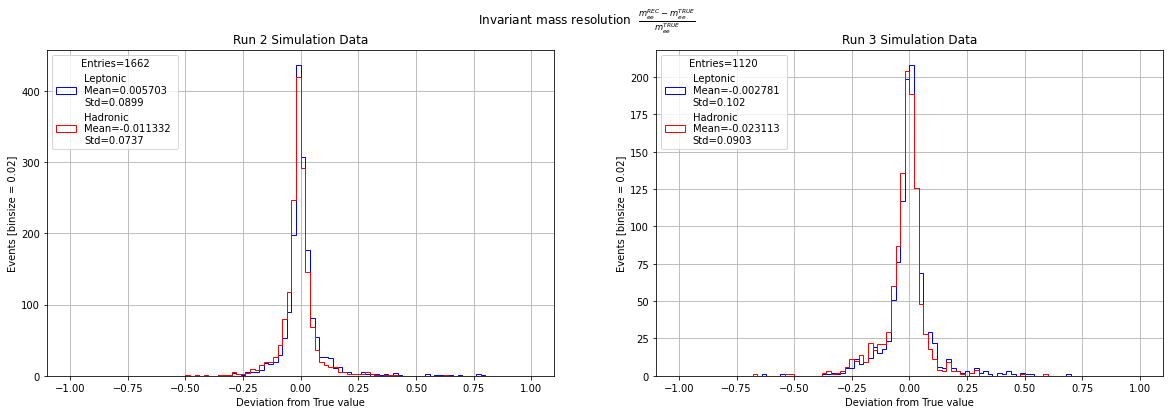

In [45]:
'''Invariant mass resolution'''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle(r'Invariant mass resolution  $\frac{m^{REC}_{ee}-m^{TRUE}_{ee}}{m^{TRUE}_{ee}}$')
ax1.hist(res_lep, bins=100, range=(-1, 1), histtype='step', color='b', label=f'Leptonic \nMean={round(res_lep.mean(), 6)} \nStd={round(res_lep.std(), 4)}')
ax1.hist(res_hadr, bins=100, range=(-1, 1), histtype='step', color='r', label=f'Hadronic \nMean={round(res_hadr.mean(), 6)} \nStd={round(res_hadr.std(), 4)}')
ax2.hist(res_lep_UP, bins=100, range=(-1, 1), histtype='step', color='b', label=f'Leptonic \nMean={round(res_lep_UP.mean(), 6)} \nStd={round(res_lep_UP.std(), 4)}')
ax2.hist(res_hadr_UP, bins=100, range=(-1, 1), histtype='step', color='r', label=f'Hadronic \nMean={round(res_hadr_UP.mean(), 6)} \nStd={round(res_hadr_UP.std(), 4)}')
ax1.grid()
ax2.grid()
ax1.set_title('Run 2 Simulation Data')
ax2.set_title('Run 3 Simulation Data')
ax1.set_ylabel(r'Events [binsize = 0.02]')
ax1.set_xlabel(r'Deviation from True value')
ax2.set_ylabel(r'Events [binsize = 0.02]')
ax2.set_xlabel(r'Deviation from True value')
ax1.legend(loc='upper left', title=f'Entries={len(res_lep)}')
ax2.legend(loc='upper left', title=f'Entries={len(res_lep_UP)}')

plt.show()

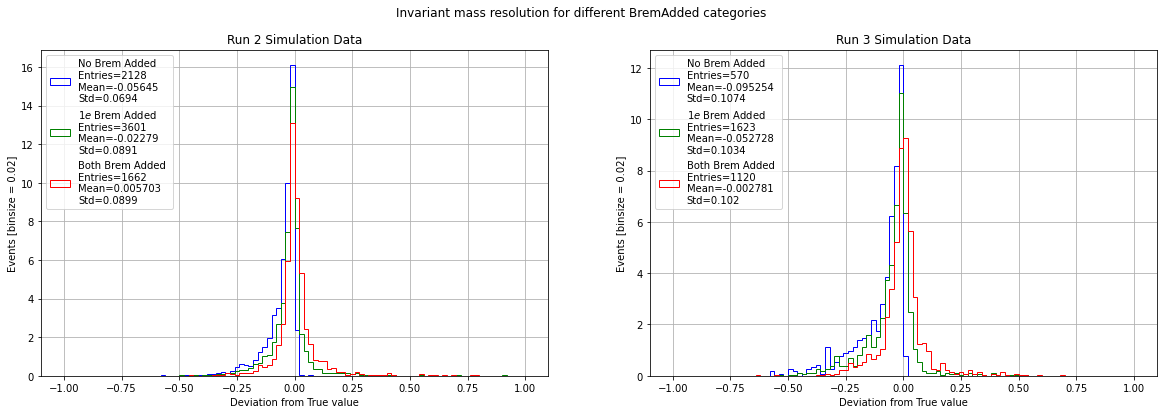

In [46]:
'''Invariant mass resolution for different bremadded categories'''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle(r'Invariant mass resolution for different BremAdded categories')
ax1.hist(res_lep_B0, bins=100, range=(-1, 1), histtype='step', density=True, color='b', label=f'No Brem Added \nEntries={len(res_lep_B0)} \nMean={round(res_lep_B0.mean(), 6)} \nStd={round(res_lep_B0.std(), 4)}')
ax1.hist(res_lep_B1, bins=100, range=(-1, 1), histtype='step', density=True, color='g', label=f'1$e$ Brem Added \nEntries={len(res_lep_B1)} \nMean={round(res_lep_B1.mean(), 6)} \nStd={round(res_lep_B1.std(), 4)}')
ax1.hist(res_lep, bins=100, range=(-1, 1), histtype='step', density=True, color='r', label=f'Both Brem Added \nEntries={len(res_lep)} \nMean={round(res_lep.mean(), 6)} \nStd={round(res_lep.std(), 4)}')
ax2.hist(res_lep_UP_B0, bins=100, range=(-1, 1), histtype='step', density=True, color='b', label=f'No Brem Added \nEntries={len(res_lep_UP_B0)} \nMean={round(res_lep_UP_B0.mean(), 6)} \nStd={round(res_lep_UP_B0.std(), 4)}')
ax2.hist(res_lep_UP_B1, bins=100, range=(-1, 1), histtype='step', density=True, color='g', label=f'1$e$ Brem Added \nEntries={len(res_lep_UP_B1)} \nMean={round(res_lep_UP_B1.mean(), 6)} \nStd={round(res_lep_UP_B1.std(), 4)}')
ax2.hist(res_lep_UP, bins=100, range=(-1, 1), histtype='step', density=True, color='r', label=f'Both Brem Added \nEntries={len(res_lep_UP)} \nMean={round(res_lep_UP.mean(), 6)} \nStd={round(res_lep_UP.std(), 4)}')
ax1.grid()
ax2.grid()
ax1.set_title('Run 2 Simulation Data')
ax2.set_title('Run 3 Simulation Data')
ax1.set_ylabel(r'Events [binsize = 0.02]')
ax1.set_xlabel(r'Deviation from True value')
ax2.set_ylabel(r'Events [binsize = 0.02]')
ax2.set_xlabel(r'Deviation from True value')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.show()